In [1]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'F:\TEP_Data\The TEP Dataset\TEP_Faulty_Training.RData')['faulty_training']

In [3]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [27]:
# Calculate the correlation matrix
corr_matrix = DF.iloc[:,3:].corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(len(to_drop)); print(to_drop)

12
['xmeas_13', 'xmeas_16', 'xmeas_25', 'xmeas_29', 'xmeas_31', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmv_6', 'xmv_7', 'xmv_8']


# Drop the corelated features

In [6]:
data = DF[DF['simulationRun']==45]
reduced_data = data.drop(columns=to_drop, axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

reduced_data

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_9,xmv_10,xmv_11
1500,0.0,4.0,1,0.25117,3641.2,4499.7,9.3640,26.893,42.359,2705.3,...,53.724,43.828,63.446,54.095,24.581,60.751,22.261,47.457,41.910,18.766
1501,0.0,4.0,2,0.24957,3652.0,4491.8,9.3392,26.804,42.441,2704.8,...,53.724,43.828,63.259,54.190,24.737,61.585,22.153,47.332,40.196,19.880
1502,0.0,4.0,3,0.24942,3665.6,4514.1,9.3934,26.533,42.053,2704.4,...,53.724,43.828,63.025,53.922,24.759,61.729,22.200,47.612,41.744,17.879
1503,0.0,4.0,4,0.25156,3659.6,4493.5,9.1898,26.828,42.495,2703.6,...,53.724,43.828,63.128,54.168,24.549,60.539,22.505,47.478,41.129,16.033
1504,0.0,4.0,5,0.30868,3679.7,4521.3,9.5622,26.862,42.378,2705.1,...,53.724,43.828,63.390,54.058,30.396,59.515,22.146,47.526,40.942,20.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,20.0,4.0,496,0.27470,3723.2,4567.9,9.3020,26.517,42.536,2721.8,...,53.431,43.461,63.705,54.337,26.975,62.505,21.052,48.829,42.194,19.600
39996,20.0,4.0,497,0.21871,3678.9,4571.4,9.2438,26.820,42.005,2720.3,...,53.431,43.461,63.124,54.213,21.423,60.565,21.235,48.456,41.728,18.774
39997,20.0,4.0,498,0.21758,3660.6,4557.0,9.3881,26.676,42.443,2716.8,...,53.431,43.461,63.440,54.385,21.534,60.861,20.585,48.127,41.100,19.396
39998,20.0,4.0,499,0.22549,3673.3,4547.5,9.3404,27.019,42.599,2717.9,...,53.431,43.461,63.126,54.451,22.272,60.715,20.895,47.778,41.116,19.053


# Scale the dataset

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()

sc.fit(reduced_data.iloc[:,3:])


MinMaxScaler()

In [8]:
data = DF.loc[(DF['simulationRun'] >= 1) & (DF['simulationRun'] <= 50)]
reduced_data = data.drop(columns=to_drop, axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

X = sc.transform(reduced_data[reduced_data['sample']>20].iloc[:,3:])
Y = reduced_data[reduced_data['sample']>20]['faultNumber'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(Y.reshape(-1, 1))

Y_enc = enc.transform(Y.reshape(-1, 1))

In [21]:
Y_enc.shape

(432000, 18)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [10]:
y_train.shape

(345600, 18)

In [11]:
type(y_train)

numpy.ndarray

In [22]:
x_train.shape[1]

40

# Train the Neural Network algorithms

In [26]:
from keras.layers import Input, Dense
from keras.models import Model

# Define input layer
inputs = Input(shape=(x_train.shape[1],))

# Define hidden layer with 16 nodes and ReLU activation function
hidden_layer = Dense(100, activation='selu')(inputs)
hidden_layer = Dense(100, activation='selu')(hidden_layer)
# Define output layer with sigmoid activation function for binary classification
outputs = Dense(y_train.shape[1], activation='softmax')(hidden_layer)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense_6 (Dense)             (None, 100)               4100      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 18)                1818      
                                                                 
Total params: 16,018
Trainable params: 16,018
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1350/1350 [==============================] - 4s 3ms/step - loss: 1.5802 - accuracy: 0.4901 - val_loss: 1.2473 - val_accuracy: 0.5834
Epoch 2/200
1350/1350 [==============================] - 4s 3ms/step - loss: 1.0985 - accuracy: 0.6399 - val_loss: 0.9762 - val_accuracy: 0.6811
Epoch 3/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.9093 - accuracy: 0.6984 - val_loss: 0.8703 - val_accuracy: 0.6970
Epoch 4/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.8187 - accuracy: 0.7232 - val_loss: 0.7919 - val_accuracy: 0.7340
Epoch 5/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.7634 - accuracy: 0.7406 - val_loss: 0.7295 - val_accuracy: 0.7543
Epoch 6/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.7186 - accuracy: 0.7540 - val_loss: 0.7085 - val_accuracy: 0.7549
Epoch 7/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.6795 - accuracy: 0.7660 - val_loss: 0.6825 - val_ac

1350/1350 [==============================] - 4s 3ms/step - loss: 0.2530 - accuracy: 0.9231 - val_loss: 0.2434 - val_accuracy: 0.9273
Epoch 58/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2515 - accuracy: 0.9235 - val_loss: 0.2522 - val_accuracy: 0.9245
Epoch 59/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2510 - accuracy: 0.9230 - val_loss: 0.2765 - val_accuracy: 0.9136
Epoch 60/200
1350/1350 [==============================] - 4s 3ms/step - loss: 0.2531 - accuracy: 0.9230 - val_loss: 0.2613 - val_accuracy: 0.9218


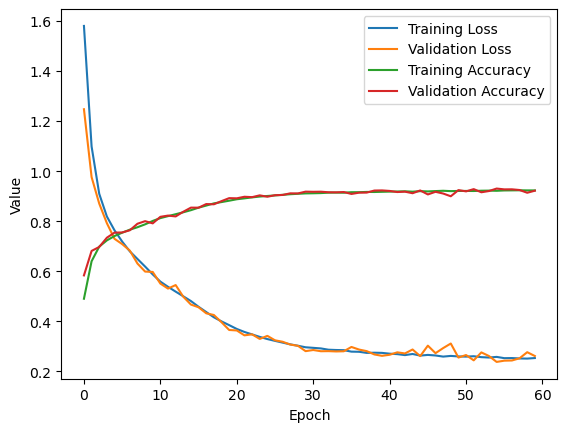

In [24]:
from keras.callbacks import EarlyStopping


# Define early stopping callback to monitor validation loss and stop if it doesn't improve for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with 20 epochs and batch size of 32, using the early stopping callback
history = model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop])

# Plot the training history for loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

# Evaluate the trained model

In [14]:
# Import the required libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

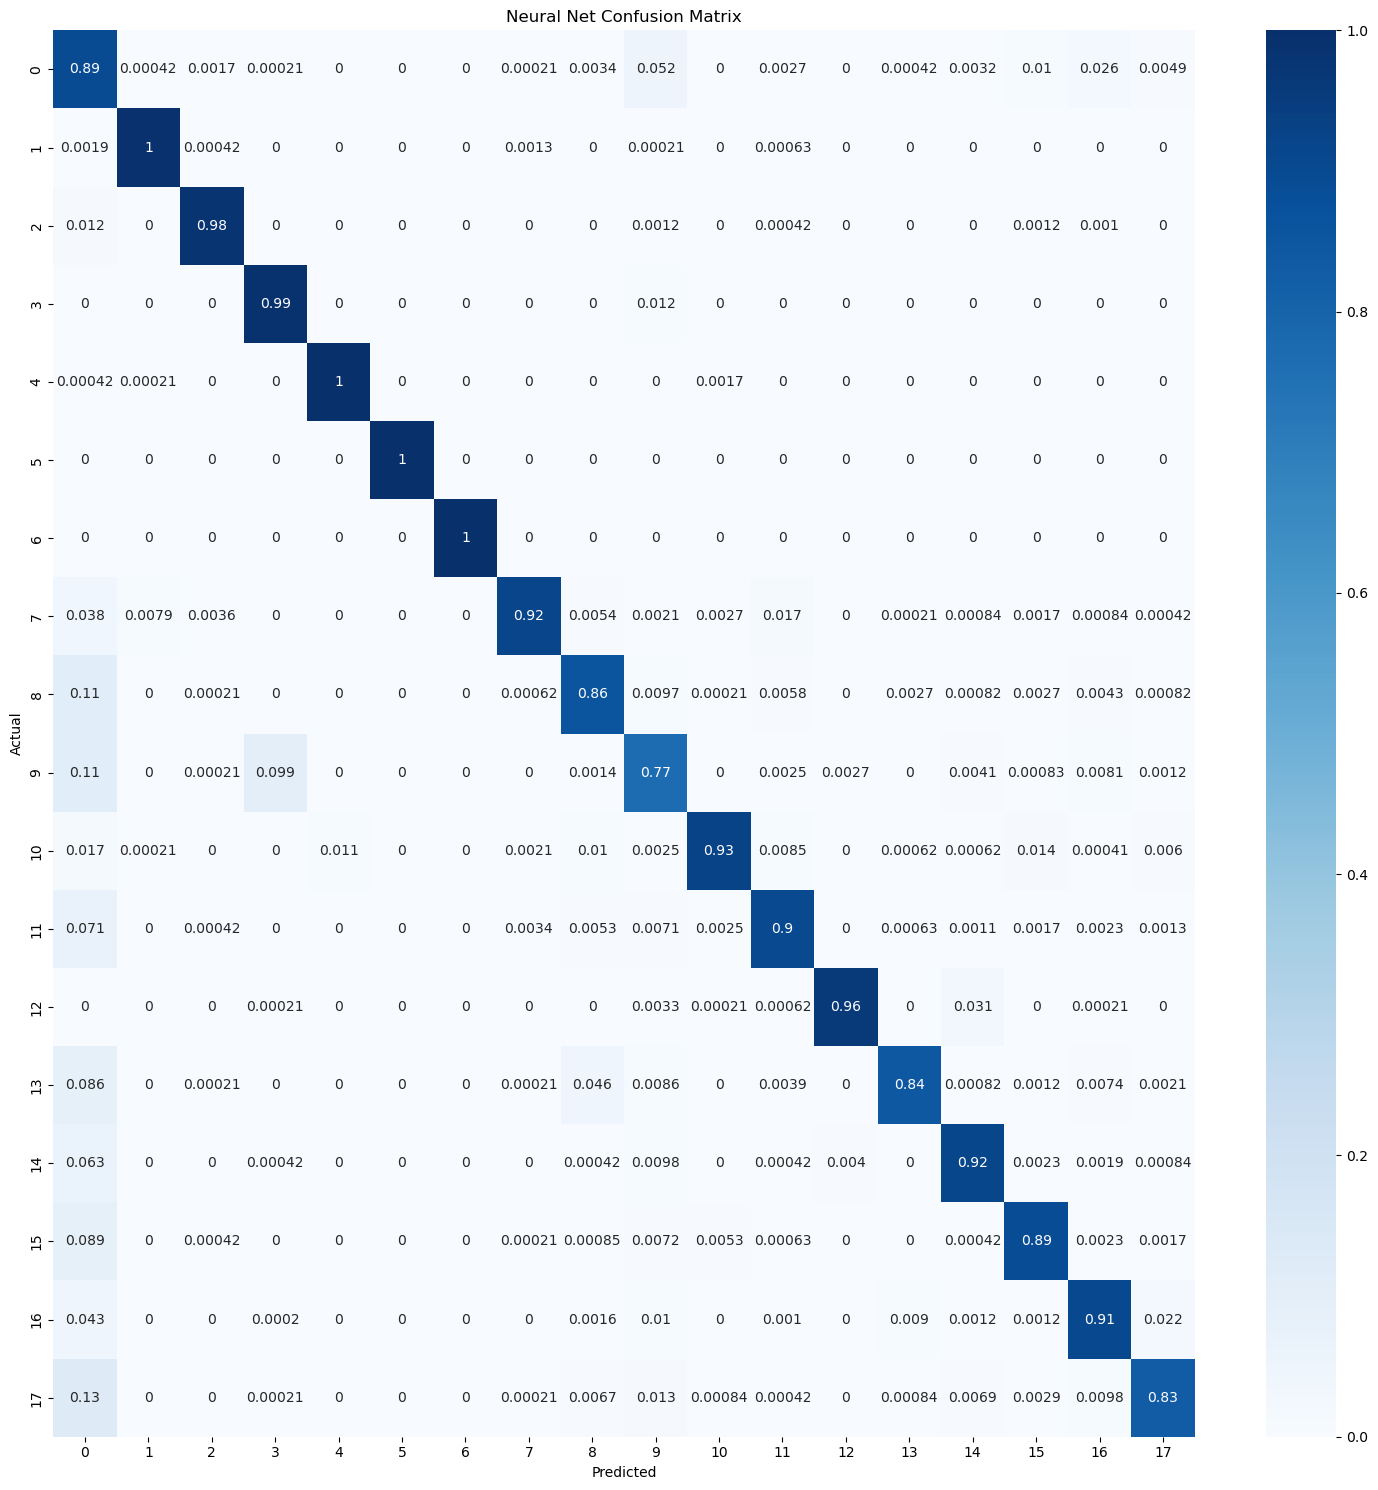

Neural Net accuracy_score: 0.9218171296296296


In [25]:


# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

y_pred = enc.inverse_transform(model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("Neural Net accuracy_score:", accuracy_score(y_true, y_pred))

# Realtime Fault Prediction

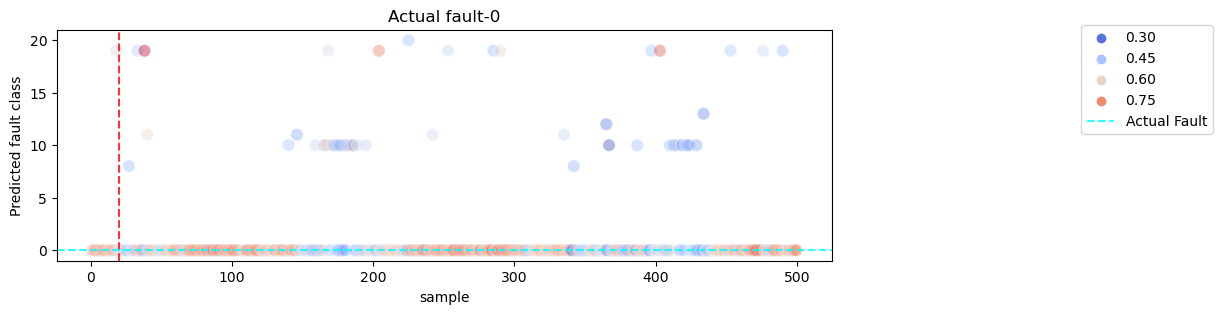

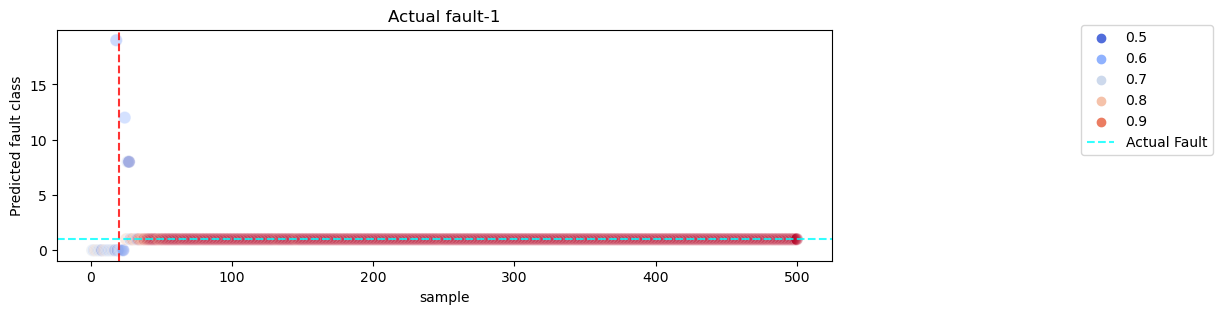

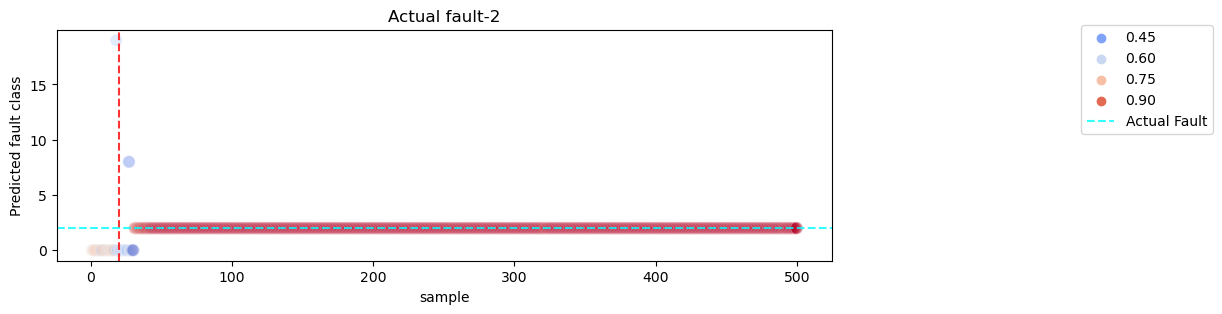

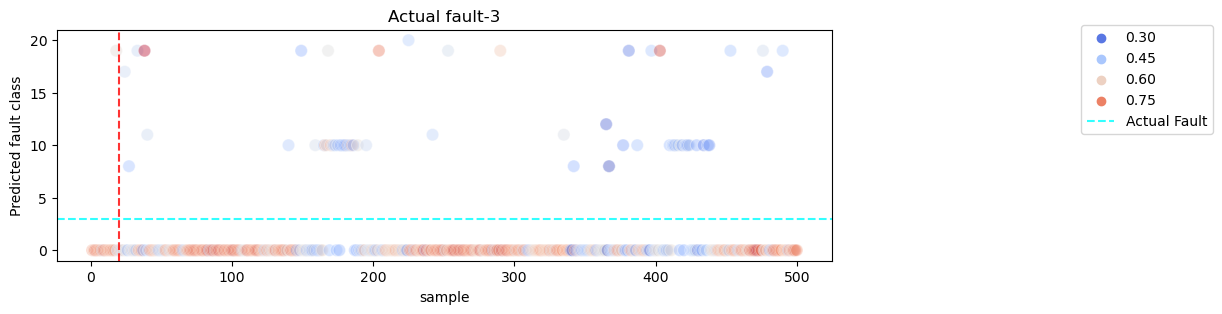

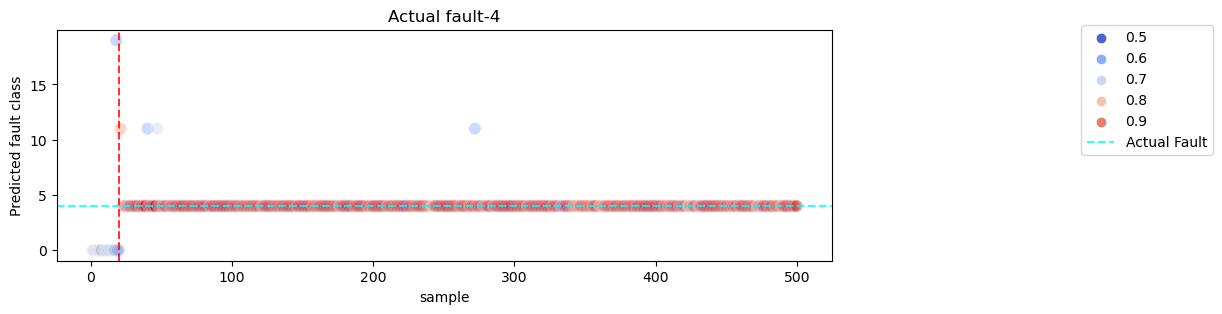

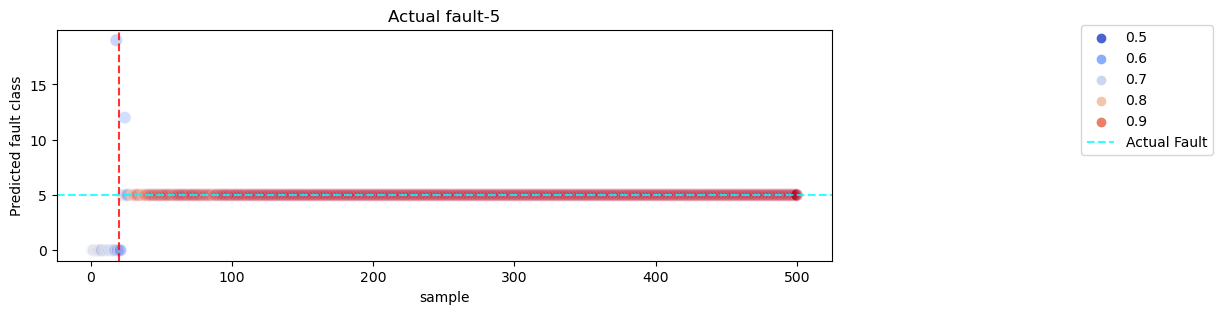

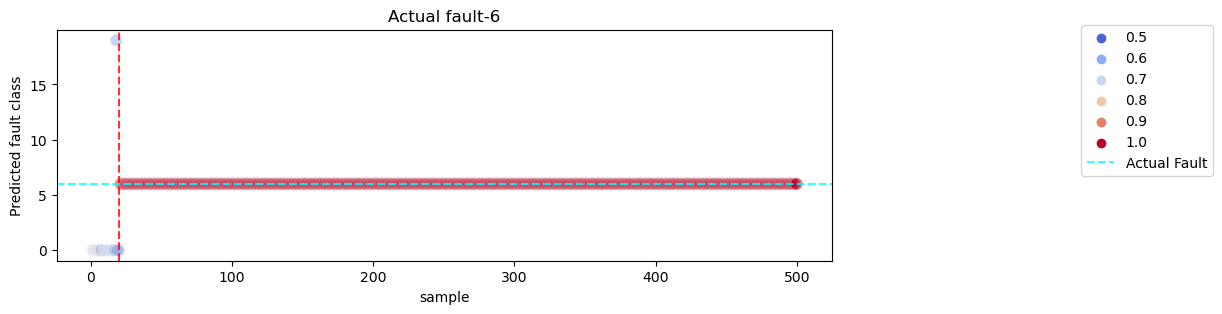

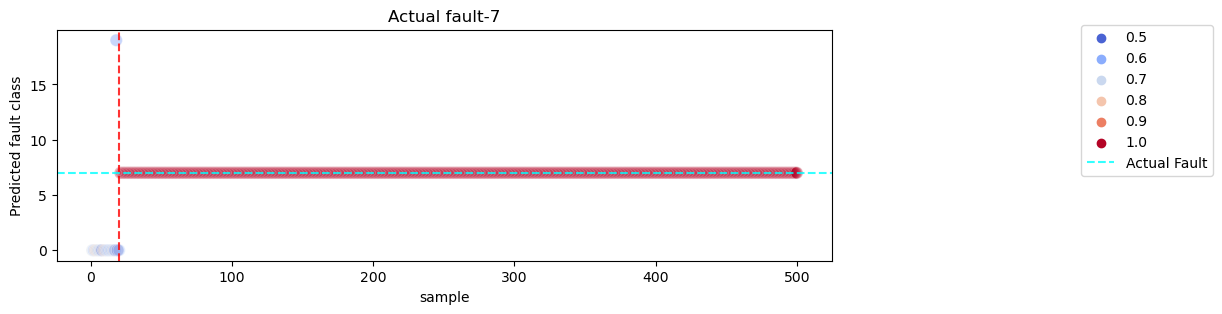

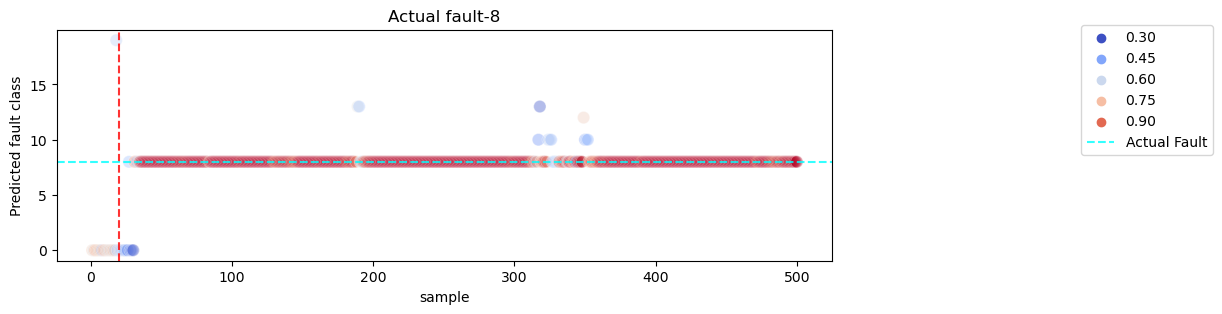

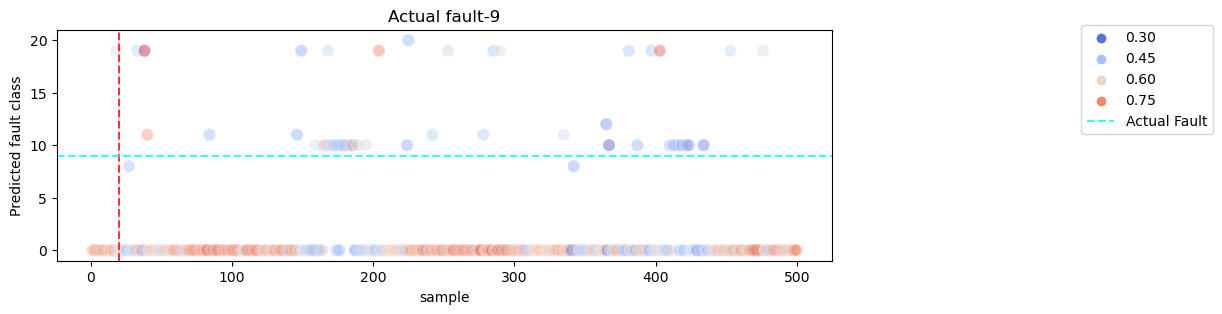

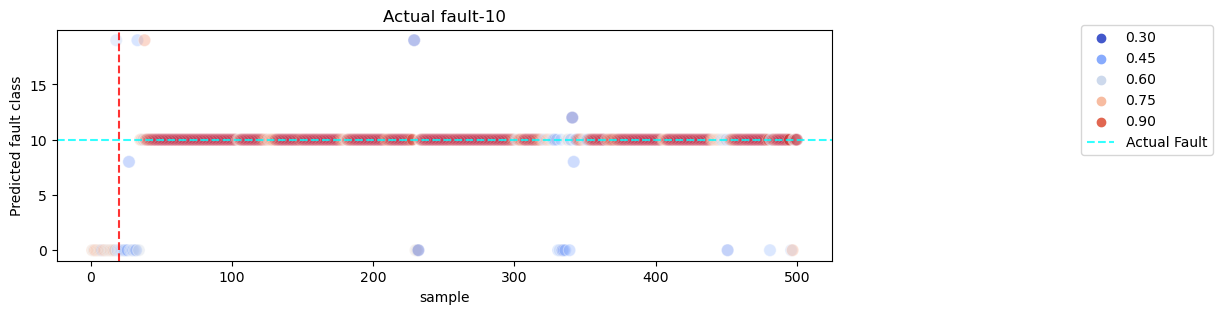

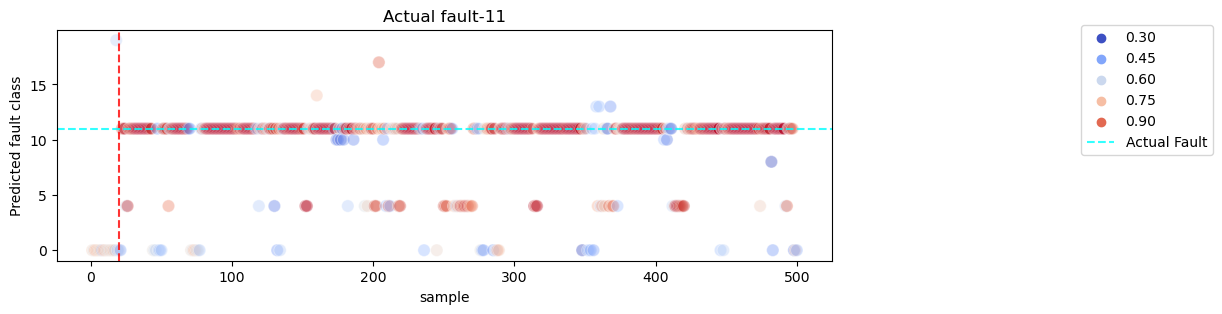

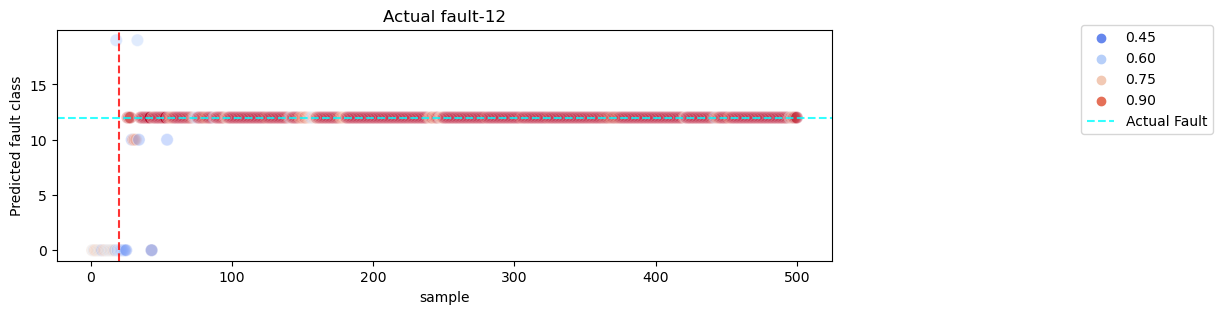

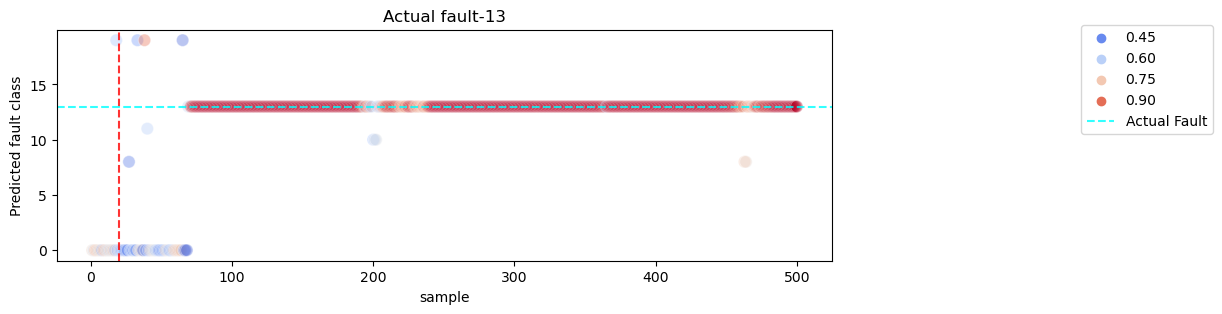

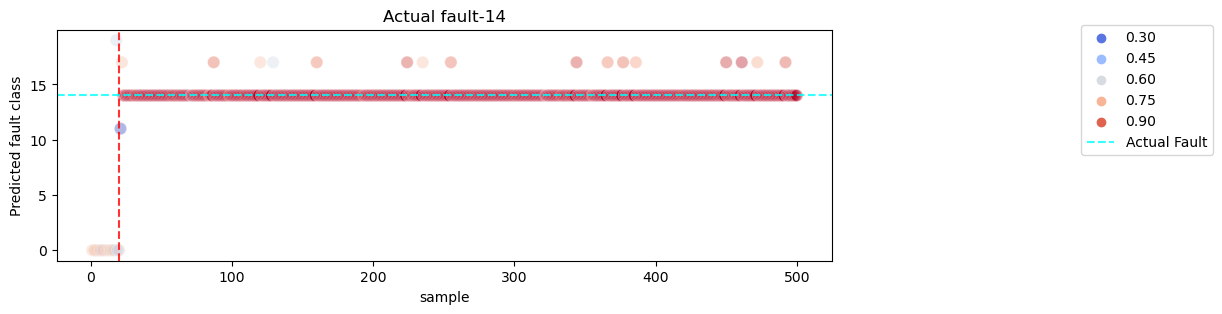

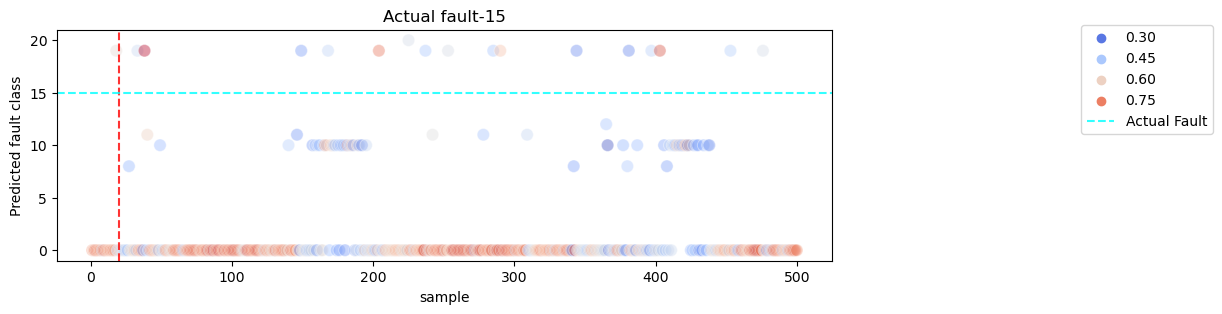

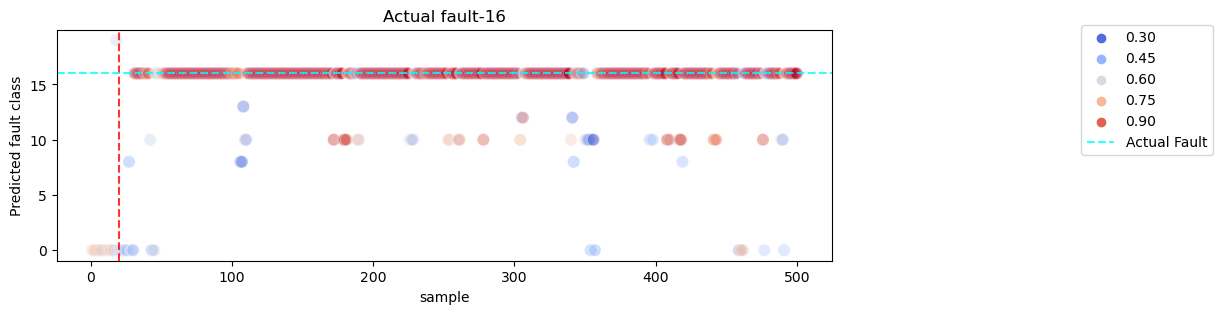

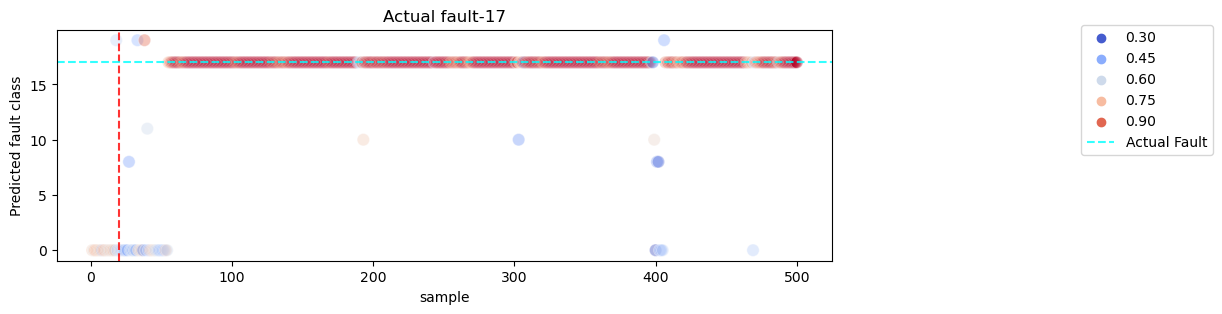

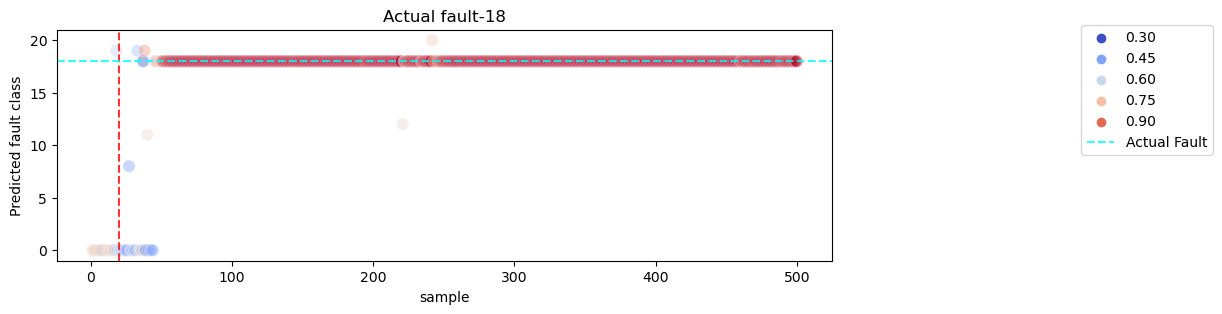

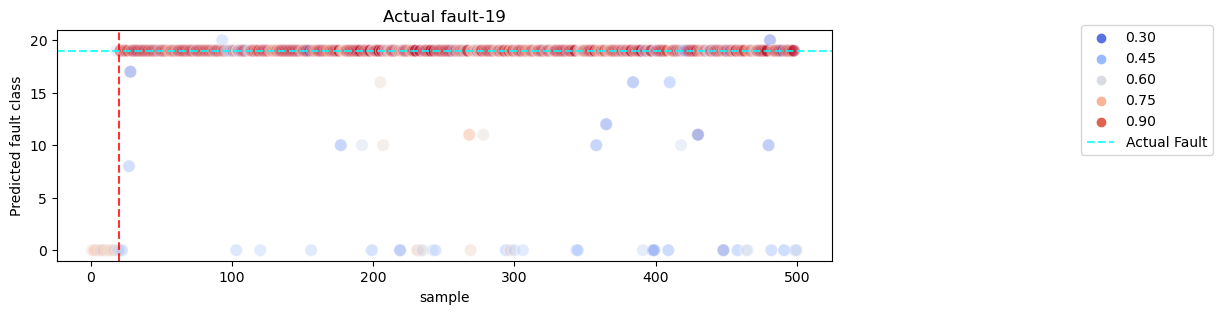

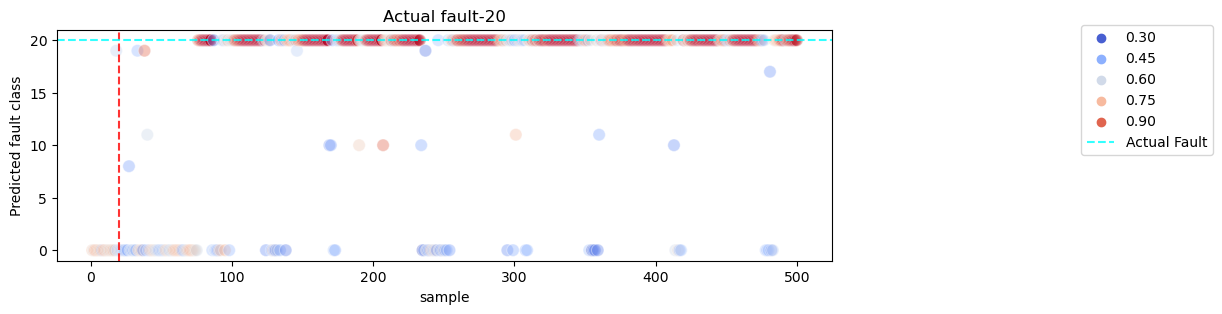

In [16]:
for F_num in range(0,21):
    df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==2)].drop(columns=to_drop, axis=1)
    x_new = df_new.iloc[:,3:]
    x_new = sc.transform(x_new)

    y_pred = enc.inverse_transform(model.predict(x_new, verbose=0))
    y_proba = np.max(model.predict(x_new, verbose=0),axis=1)

    f, ax = plt.subplots(figsize=(10,3))
    
    sns.scatterplot(x=df_new['sample'],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()


# Obtain SIngle Accuracy Score matrice

In [17]:
Accuracy=[]
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['sample']>20) & (DF['simulationRun']==np.random.randint(1,500))]
    X_faulty = sc.transform(temp_df.iloc[:,3:].drop(columns=to_drop, axis=1))
    y_true = temp_df['faultNumber']
    
    y_pred = enc.inverse_transform(model.predict(X_faulty, verbose=0))
    
    
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    
    Accuracy.append(acc)
print("#"*20)
print(f'The overall accuracy is {np.mean(Accuracy)}')

The accuracy for Fault_num=0 is 0.9583333333333334
The accuracy for Fault_num=1 is 0.9895833333333334
The accuracy for Fault_num=2 is 0.9833333333333333
The accuracy for Fault_num=4 is 0.99375
The accuracy for Fault_num=5 is 0.9916666666666667
The accuracy for Fault_num=6 is 1.0
The accuracy for Fault_num=7 is 1.0
The accuracy for Fault_num=8 is 0.94375
The accuracy for Fault_num=10 is 0.7979166666666667
The accuracy for Fault_num=11 is 0.7895833333333333
The accuracy for Fault_num=12 is 0.9583333333333334
The accuracy for Fault_num=13 is 0.8770833333333333
The accuracy for Fault_num=14 is 0.9645833333333333
The accuracy for Fault_num=16 is 0.8104166666666667
The accuracy for Fault_num=17 is 0.9
The accuracy for Fault_num=18 is 0.9458333333333333
The accuracy for Fault_num=19 is 0.88125
The accuracy for Fault_num=20 is 0.75625
####################
The overall accuracy is 0.9189814814814815


# t-sne Visualization

Text(0.5, 1.0, 'Before training')

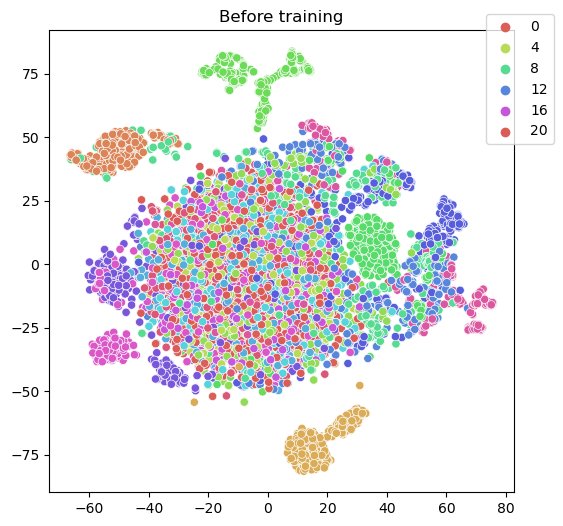

In [18]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_train[::50,:])
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

f, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,palette="hls")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Before training')

# After Training

In [19]:
from tensorflow.keras import Model

intermediate_model = Model(inputs=model.input,outputs=model.layers[-2].output)
intermediate_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 14,200
Trainable params: 14,200
Non-trainable params: 0
_________________________________________________________________


216/216 [==============================] - 0s 1ms/step


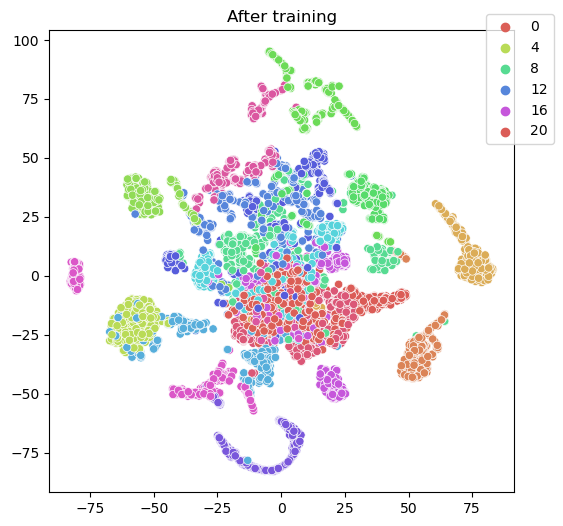

In [20]:
x_inter = intermediate_model.predict(x_train[::50,:])

x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_inter)
y_label = enc.inverse_transform(y_train[::50,:]).reshape(-1)

f, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x=x_embedded[:,0],y=x_embedded[:,1],hue=y_label,palette="hls")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()